In [1]:
# Make BART Great (for once)
# Magic
%matplotlib notebook
# Dependencies
import os
import csv
import pandas as pd
import json
import requests
from pprint import pprint
import matplotlib.pyplot as plt 
import numpy as np
# Personal dependencies
from config import nyc_track_length, nyc_avg_fare, nyc_budg

In [2]:
# 2015 BART station data
bart_station_api_url = 'https://data.bart.gov/api/3/action/datastore_search'
all_stations = '?resource_id=48bee8d8-6106-4215-a937-31d71ee09f0c'
limit_search = '&limit=5'
bart_station_json = requests.get(bart_station_api_url + all_stations).json()
num_bart_stations = len(bart_station_json['result']['records'])
print(f'BART has {num_bart_stations} stations.')

BART has 45 stations.


In [3]:
# Sao Paulo metro data
# Bring csv data into pandas dataframe
sp_metro_file = os.path.join('sao-paulo-metro-data', 'metrosp_stations_v2.csv')
with open(sp_metro_file, newline='') as metro_holder:
    sp_metro = csv.reader(metro_holder, delimiter=',')
    sp_metro_headers = next(sp_metro)
    sp_metro_data = pd.DataFrame([row for row in sp_metro])

# Clean sp metro data
sp_metro_data = sp_metro_data.rename(columns={0: sp_metro_headers[0],
                                              1: sp_metro_headers[1],
                                              2: sp_metro_headers[2],
                                              3: sp_metro_headers[3],
                                              4: sp_metro_headers[4],
                                              5: sp_metro_headers[5]})
sp_metro_data = sp_metro_data.drop(columns=['', 'station', 'lat', 'lon'])

num_sp_stations = len(sp_metro_data['name'])

sp_lines = list(sp_metro_data['line'].value_counts().index[:6])
num_sp_lines = len(sp_lines)
sp_metro_cost = 1.22

print(f'Sao Paulo metro has {num_sp_stations} stations and a total of {num_sp_lines} lines.')
print(f'Sao Paulo metro lines: {sp_lines}')
print(f'Sao Paulo metro costs: ${sp_metro_cost}')

Sao Paulo metro has 79 stations and a total of 6 lines.
Sao Paulo metro lines: ["['azul']", "['vermelha']", "['lilas']", "['verde']", "['amarela']", "['prata']"]
Sao Paulo metro costs: $1.22


In [4]:
#NYC subway data
#bring csv into pandas dataframe
nyc_metro_file = os.path.join('nyc-metro-data', 'stops.csv')
with open(nyc_metro_file, newline='') as metro_holder:
    nyc_metro = csv.reader(metro_holder, delimiter=',')
    nyc_metro_headers = next(nyc_metro)
    nyc_metro_data = pd.DataFrame([row for row in nyc_metro])
#cleaning nyc data
nyc_metro_data = nyc_metro_data.rename(columns={0: nyc_metro_headers[0],
                                              1: nyc_metro_headers[1],
                                              2: nyc_metro_headers[2],
                                              3: nyc_metro_headers[3],
                                              4: nyc_metro_headers[4],
                                              5: nyc_metro_headers[5],
                                              6: nyc_metro_headers[6],
                                              7: nyc_metro_headers[7],
                                              8: nyc_metro_headers[8],
                                              9: nyc_metro_headers[9]})
nyc_metro_data = nyc_metro_data.drop(columns=['stop_code', 'stop_desc', 'zone_id', 'stop_url'])

nyc_station_total = len(nyc_metro_data.stop_name.value_counts())
print(f'The NYC subway has {nyc_station_total} stations.')
nyc_metro_data.head()

The NYC subway has 380 stations.


,stop_id,stop_name,stop_lat,stop_lon,location_type,parent_station
0,101,Van Cortlandt Park - 242 St,40.889248,-73.898583,1,
1,101N,Van Cortlandt Park - 242 St,40.889248,-73.898583,0,101
2,101S,Van Cortlandt Park - 242 St,40.889248,-73.898583,0,101
3,103,238 St,40.884667,-73.90087,1,
4,103N,238 St,40.884667,-73.90087,0,103


In [5]:
'''#London tube data
#call api for data
tube_station_url = "https://api.tfl.gov.uk/Stoppoint/940GZZLUCHX/FareTo/940GZZLUBST"
tube_station_data = requests.get(tube_station_url).json()
pprint(tube_station_data)'''

'#London tube data\n#call api for data\ntube_station_url = "https://api.tfl.gov.uk/Stoppoint/940GZZLUCHX/FareTo/940GZZLUBST"\ntube_station_data = requests.get(tube_station_url).json()\npprint(tube_station_data)'

In [6]:
# TFL (transport for london) data
# Operational performance measures for london tube
london_tube_op_metrics = pd.DataFrame(
                        {"London Underground": ["Passenger journeys (millions)", "Kilometres operated (millions)",
                                                "Schedule operated (%)", "Excess journey time (weighted) (minutes)",
                                                "Customer satisfaction (score)", "Lost customer hours (millions)"],
                         "2014/15": [1305, 80.3, 97.6, 4.6, 84, 22.7],
                         "2015/16": [1349, 82.5, 97.0, 4.6, 85, 26.5],
                         "2016/17": [1378, 83.7, 96.9, 4.7, 85, 26.1],
                         "2017/18": [1357, 84.4, 96.6, 4.6, 85, 23.9],
                         "2018/19": [1384, 85.0, 96.8, 4.6, 84, 24.6]})
london_tube_op_metrics

,London Underground,2014/15,2015/16,2016/17,2017/18,2018/19
0,Passenger journeys (millions),1305.0,1349.0,1378.0,1357.0,1384.0
1,Kilometres operated (millions),80.3,82.5,83.7,84.4,85.0
2,Schedule operated (%),97.6,97.0,96.9,96.6,96.8
3,Excess journey time (weighted) (minutes),4.6,4.6,4.7,4.6,4.6
4,Customer satisfaction (score),84.0,85.0,85.0,85.0,84.0
5,Lost customer hours (millions),22.7,26.5,26.1,23.9,24.6


In [7]:
# London tube fares 2019
tube_fares_2019 = {"Zones Traveled": ["Zone 1", "Zone 1 & 2", "Zone 1 To 3", "Zone 1 To 4", 
                                    "Zone 1 To 5", "Zone 1 To 6", "Zone 2 To 6"],
                 "Single Journey Ticket Adult": [4.90, 4.90, 4.90, 5.90, 5.90, 6.00, 5.90],
                 "Single Journey Ticket Child": [2.40, 2.40, 2.40, 2.90, 2.90, 3.00, 2.90],
                 "Oyster Card Peak": [2.40, 2.90, 3.30, 3.90, 4.70, 5.10, 4.40],
                 "Oyster Card Off Peak": [2.40, 2.40, 2.80, 2.80, 3.10, 3.10, 3.00]}

def poundToDollar(pound):
    dollar = pound * 1.23
    return round(dollar, 2)

for d in range(0, len(tube_fares_2019["Single Journey Ticket Adult"])):
    tube_fares_2019["Single Journey Ticket Adult"][d] = poundToDollar(tube_fares_2019["Single Journey Ticket Adult"][d])

for d in range(0, len(tube_fares_2019["Single Journey Ticket Child"])):
    tube_fares_2019["Single Journey Ticket Child"][d] = poundToDollar(tube_fares_2019["Single Journey Ticket Child"][d])

for d in range(0, len(tube_fares_2019["Oyster Card Peak"])):
    tube_fares_2019["Oyster Card Peak"][d] = poundToDollar(tube_fares_2019["Oyster Card Peak"][d])

for d in range(0, len(tube_fares_2019["Oyster Card Off Peak"])):
    tube_fares_2019["Oyster Card Off Peak"][d] = poundToDollar(tube_fares_2019["Oyster Card Off Peak"][d])

tube_fares_2019 = pd.DataFrame(tube_fares_2019)
tube_fares_2019

,Zones Traveled,Single Journey Ticket Adult,Single Journey Ticket Child,Oyster Card Peak,Oyster Card Off Peak
0,Zone 1,6.03,2.95,2.95,2.95
1,Zone 1 & 2,6.03,2.95,3.57,2.95
2,Zone 1 To 3,6.03,2.95,4.06,3.44
3,Zone 1 To 4,7.26,3.57,4.80,3.44
4,Zone 1 To 5,7.26,3.57,5.78,3.81
5,Zone 1 To 6,7.38,3.69,6.27,3.81
6,Zone 2 To 6,7.26,3.57,5.41,3.69


In [8]:
tube_dat15 = 'tube-data/2015 Entry & Exit.csv'
tube15_data = pd.read_csv(tube_dat15)

traffic15 = round(sum(tube15_data['Entry + Exit (Millions)'] * 1000000), 0)
print(f'The total 2015 traffic in the london tube was {traffic15}')

The total 2015 traffic in the london tube was 2925569154.0


In [9]:
tube_station_count = len(tube15_data["Station"])
print(f'The London Tube has {tube_station_count} stations.')

tube_lines = ['Bakerloo', 'Central', 'Circle', 'District', 'Hammersmith & City', 'Jubilee',
              'Metropolitan', 'Northern', 'Piccadilly', 'Victoria', 'Waterloo & City']
tube_line_count = len(tube_lines)
print(f'The London Tube has {tube_line_count} lines.')

The London Tube has 268 stations.
The London Tube has 11 lines.


In [10]:
tube_dat16 = 'tube-data/2016 Entry & Exit.csv'
tube16_data = pd.read_csv(tube_dat16)

traffic16 = round(sum(tube16_data['Entry + Exit (Millions)'] * 1000000), 0)
print(f'The total 2016 traffic in the london tube was {traffic16}')

The total 2016 traffic in the london tube was 2985860000.0


In [11]:
tube_dat17 = 'tube-data/2017 Entry & Exit.csv'
tube17_data = pd.read_csv(tube_dat17)

traffic17 = round(sum(tube17_data['Entry + Exit (Millions)'] * 1000000), 0)
print(f'The total 2017 traffic in the london tube was {traffic17}')

The total 2017 traffic in the london tube was 2945940000.0


In [12]:
# Total station traffic 
tube_station_traffic = [traffic15, traffic16, traffic17]
tube_station_traffic

[2925569154.0, 2985860000.0, 2945940000.0]

In [13]:
# Op cost per passenger per mile
op_cost_per_mile17 = 9.30
tube_track_length = 250
op_cost17 = op_cost_per_mile17 * tube_track_length
op_cost_per_pas_per_mile17 = (op_cost17 / traffic17) * tube_track_length
op_cost_per_pas_per_mile17

0.00019730544410273123

In [14]:
#NYC subway data
#bring csvs into pandas dataframes
nyc_metro_file = os.path.join('nyc-metro-data', 'stops.csv')
with open(nyc_metro_file, newline='') as metro_holder:
    nyc_metro = csv.reader(metro_holder, delimiter=',')
    nyc_metro_headers = next(nyc_metro)
    nyc_metro_data = pd.DataFrame([row for row in nyc_metro])
nyc_metro_file2 = os.path.join('nyc-metro-data', 'nyc-transit-subway-entrance-and-exit-data.csv')
with open(nyc_metro_file2, newline='') as metro_holder2:
    nyc_metro2 = csv.reader(metro_holder2, delimiter=',')
    nyc_metro_headers2 = next(nyc_metro2)
    nyc_metro_data2 = pd.DataFrame([row for row in nyc_metro2])
nyc_metro_file17 = os.path.join('nyc-metro-data', '2017-station-entry-and-exit-figures.csv')
with open(nyc_metro_file17, newline='') as metro_holder17:
    nyc_metro17 = csv.reader(metro_holder17, delimiter=',')
    nyc_metro_headers17 = next(nyc_metro17)
    nyc_metro_data17 = pd.DataFrame([row for row in nyc_metro17])
nyc_metro_file16 = os.path.join('nyc-metro-data', '2016-station-entry-and-exit-figures.csv')
with open(nyc_metro_file16, newline='') as metro_holder16:
    nyc_metro16 = csv.reader(metro_holder16, delimiter=',')
    nyc_metro_headers16 = next(nyc_metro16)
    nyc_metro_data16 = pd.DataFrame([row for row in nyc_metro16])
nyc_metro_file15 = os.path.join('nyc-metro-data', '2015-station-entry-and-exit-figures.csv')
with open(nyc_metro_file15, newline='') as metro_holder15:
    nyc_metro15 = csv.reader(metro_holder15, delimiter=',')
    nyc_metro_headers15 = next(nyc_metro15)
    nyc_metro_data15 = pd.DataFrame([row for row in nyc_metro15])
#cleaning nyc data
nyc_metro_data = nyc_metro_data.rename(columns={0: nyc_metro_headers[0],
                                              1: nyc_metro_headers[1],
                                              2: nyc_metro_headers[2],
                                              3: nyc_metro_headers[3],
                                              4: nyc_metro_headers[4],
                                              5: nyc_metro_headers[5],
                                              6: nyc_metro_headers[6],
                                              7: nyc_metro_headers[7],
                                              8: nyc_metro_headers[8],
                                              9: nyc_metro_headers[9]})
nyc_metro_data2 = nyc_metro_data2[[0, 1, 2, 3, 4]]
nyc_metro_data2 = nyc_metro_data2.rename(columns={0: nyc_metro_headers2[0],
                                              1: nyc_metro_headers2[1],
                                              2: nyc_metro_headers2[2],
                                              3: nyc_metro_headers2[3],
                                              4: nyc_metro_headers2[4]})
nyc_metro_data = nyc_metro_data.drop(columns=['stop_code', 'stop_desc', 'zone_id', 'stop_url'])
nyc_metro_data17 = nyc_metro_data17.rename(columns={0: nyc_metro_headers17[0],
                                              1: nyc_metro_headers17[1],
                                              2: nyc_metro_headers17[2],
                                              3: nyc_metro_headers17[3],
                                              4: nyc_metro_headers17[4],
                                              5: nyc_metro_headers17[5],
                                              6: nyc_metro_headers17[6],
                                              7: nyc_metro_headers17[7],
                                              8: nyc_metro_headers17[8],
                                              9: nyc_metro_headers17[9],
                                              10: nyc_metro_headers17[10]})
nyc_metro_data16 = nyc_metro_data16.rename(columns={0: nyc_metro_headers16[0],
                                              1: nyc_metro_headers16[1],
                                              2: nyc_metro_headers16[2],
                                              3: nyc_metro_headers16[3],
                                              4: nyc_metro_headers16[4],
                                              5: nyc_metro_headers16[5],
                                              6: nyc_metro_headers16[6],
                                              7: nyc_metro_headers16[7],
                                              8: nyc_metro_headers16[8],
                                              9: nyc_metro_headers16[9],
                                              10: nyc_metro_headers16[10]})
nyc_metro_data15 = nyc_metro_data15.rename(columns={0: nyc_metro_headers15[0],
                                              1: nyc_metro_headers15[1],
                                              2: nyc_metro_headers15[2],
                                              3: nyc_metro_headers15[3],
                                              4: nyc_metro_headers15[4],
                                              5: nyc_metro_headers15[5],
                                              6: nyc_metro_headers15[6],
                                              7: nyc_metro_headers15[7],
                                              8: nyc_metro_headers15[8],
                                              9: nyc_metro_headers15[9],
                                              10: nyc_metro_headers15[10]})
#nyc_metro_data2.head()
#nyc_metro_data15.head()
nyc_metro_data17['million'] = pd.to_numeric(nyc_metro_data17['million'], errors='coerce')
nyc_total_rider17 = nyc_metro_data17['million'].sum() * 1000000
nyc_opp_cost17 = nyc_budg / (nyc_track_length * nyc_total_rider17)
nyc_metro_data16['million'] = pd.to_numeric(nyc_metro_data16['million'], errors='coerce')
nyc_total_rider16 = nyc_metro_data16['million'].sum() * 1000000
nyc_opp_cost16 = nyc_budg / (nyc_track_length * nyc_total_rider16)
nyc_metro_data15['million'] = pd.to_numeric(nyc_metro_data15['million'], errors='coerce')
nyc_total_rider15 = nyc_metro_data15['million'].sum() * 1000000
nyc_opp_cost15 = nyc_budg / (nyc_track_length * nyc_total_rider15)
#print(nyc_total_rider)
nyc_station_total = len(nyc_metro_data.stop_name.value_counts())
nyc_line_total = len(nyc_metro_data2.Line.value_counts())
print(f'The NYC subway has {nyc_station_total} stations.')
print(f'The NYC subway has {nyc_line_total} lines.')
print(f'The NYC subway has {nyc_track_length} miles of track.')
print(f'The NYC subway has an average fare of ${nyc_avg_fare}.')
print(f'The NYC subway has an annual ridership of {nyc_total_rider17} riders.')
print(f'The NYC subway has an annual ridership of {nyc_total_rider16} riders.')
print(f'The NYC subway has an annual ridership of {nyc_total_rider15} riders.')
print(f'The NYC subway had a cost per mile per customer of ${nyc_opp_cost17} in 2017.')
print(f'The NYC subway had a cost per mile per customer of ${nyc_opp_cost16} in 2016.')
print(f'The NYC subway had a cost per mile per customer of ${nyc_opp_cost15} in 2015.')

The NYC subway has 380 stations.
The NYC subway has 36 lines.
The NYC subway has 660.75 miles of track.
The NYC subway has an average fare of $2.75.
The NYC subway has an annual ridership of 353102740000.0 riders.
The NYC subway has an annual ridership of 2985859999.9999995 riders.
The NYC subway has an annual ridership of 2925569154.0000005 riders.
The NYC subway had a cost per mile per customer of $6.857751175283427e-05 in 2017.
The NYC subway had a cost per mile per customer of $0.008109860242043495 in 2016.
The NYC subway had a cost per mile per customer of $0.008276990229132003 in 2015.


In [15]:
#BART Bringing in Operating Cost per Passenger CSV
operating_costs = "BART Data Sources/Financial Security_2018.csv"
operating_costs_pd = pd.read_csv(operating_costs)
#operating_costs_pd.head()

# BART Station Traffic 2015-2018
ridership = "BART Data Sources/Sum_Ridership.csv"
ridership_pd = pd.read_csv(ridership)
#ridership_pd.head()

# BART Rider Satisfaction (customer complaints)
customer_complaints = "BART Data Sources/Customer Complaints Jan-Jun 2018.csv"
customer_complaints_pd = pd.read_csv(customer_complaints)
customer_complaints_pd.head()

,Case Origin,Type,Category,Sub-Category,Station,Date/Time Opened,Date/Time Closed,Age (Days)
0,Website,Complaint,Police,Lack of Presence - STA,M30 - Powell St. (SF),4/1/18 1:00,4/3/18 13:48,3.0
1,Website,Complaint,Police,Lack of Presence - STA,M30 - Powell St. (SF),4/1/18 1:00,4/3/18 13:45,3.0
2,Website,Complaint,Maintenance and Equipment,M&E Misc.,M60 - 24th St. Mission (SF),4/1/18 9:19,4/3/18 11:39,2.0
3,Website,Complaint,Police,Lack of Presence - Train,NaN,4/1/18 12:59,4/3/18 11:34,2.0
4,Website,Complaint,Police,Lack of Presence - STA,C50 - Pleasant Hill/Contra Costa Centre,4/1/18 14:46,4/3/18 12:38,2.0


<IPython.core.display.Javascript object>


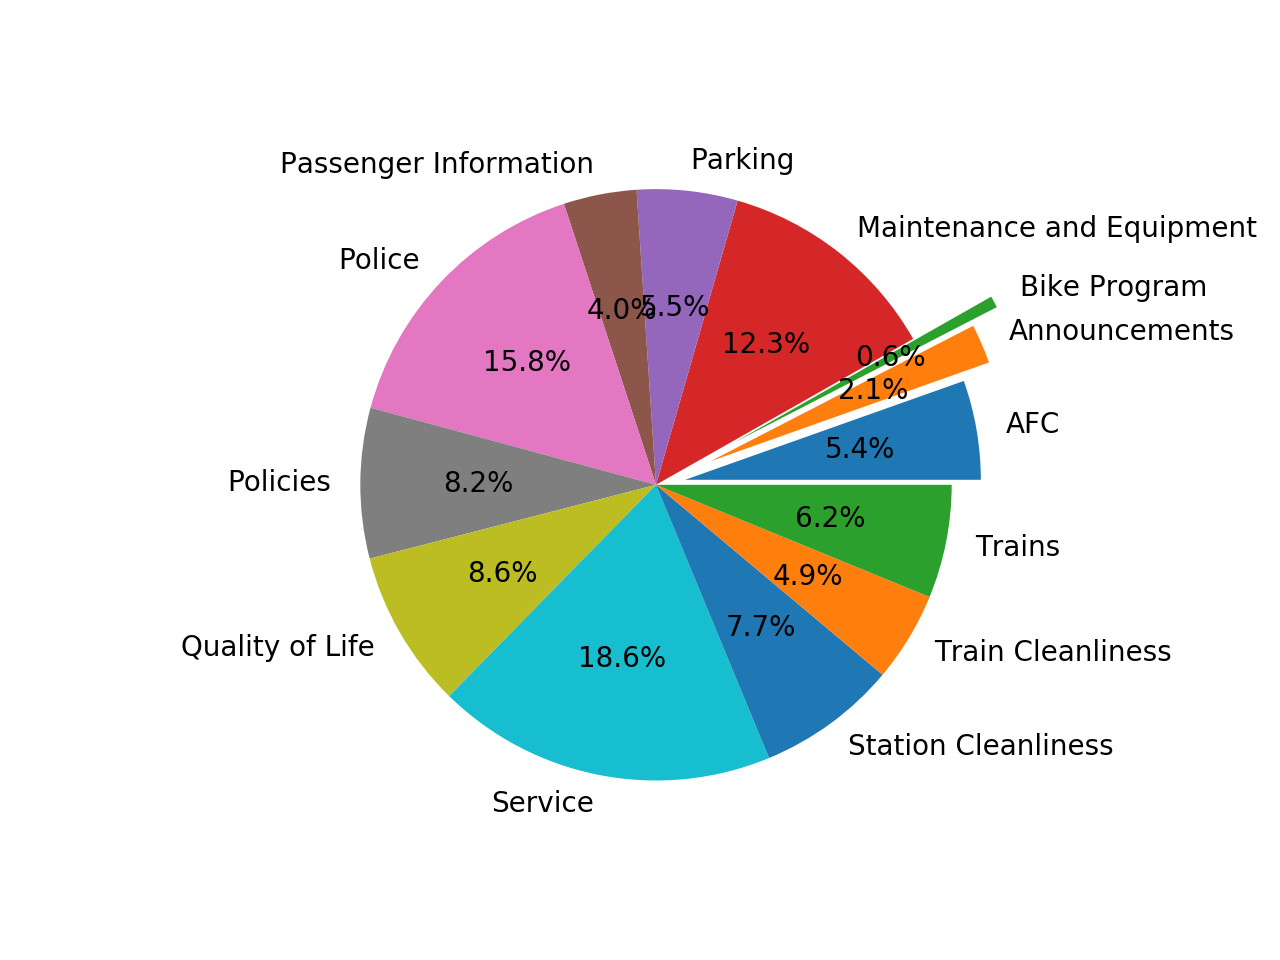

([<matplotlib.patches.Wedge at 0x121e19080>,
 [Text(1.1826155008142527, 0.20352045900560992, 'AFC'),
  Text(1.1930976188313194, 0.5162538832193287, 'Announcements'),
  Text(1.2312914495090774, 0.6662742426102296, 'Bike Program'),
  Text(0.6806908056576634, 0.8640949178725225, 'Maintenance and Equipment'),
  Text(0.1173848125499993, 1.093718796484088, 'Parking'),
  Text(-0.20917613140956345, 1.0799283985748913, 'Passenger Information'),
  Text(-0.7981755102006973, 0.7569120522992462, 'Police'),
  Text(-1.0999825837295283, 0.006189950865011436, 'Policies'),
  Text(-0.9523330736312959, -0.5505104148587644, 'Quality of Life'),
  Text(-0.20917617564527313, -1.0799283900066792, 'Service'),
  Text(0.6504207734974732, -0.8871036114248149, 'Station Cleanliness'),
  Text(0.9415352796571221, -0.5687805527274864, 'Train Cleanliness'),
  Text(1.0792501886071217, -0.21264766726087628, 'Trains')],
 [Text(0.6898590421416474, 0.11872026775327243, '5.4%'),
  Text(0.7342139192808118, 0.31769469736574074,

In [16]:
# Pie chart for complaints
df = pd.read_csv ('BART Data Sources/Customer_Complaints_Q1_Q2_2018 1.csv')
sums = df.groupby(df["Categories"])["Sum_Categories"].sum()
#plt.title= 'Percentage of Bart Complaints by Category Q1-Q2 2018'
plt.pie(sums, labels=sums.index, explode= (0.1, 0.2, 0.3, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0), autopct='%1.1f%%')

<IPython.core.display.Javascript object>


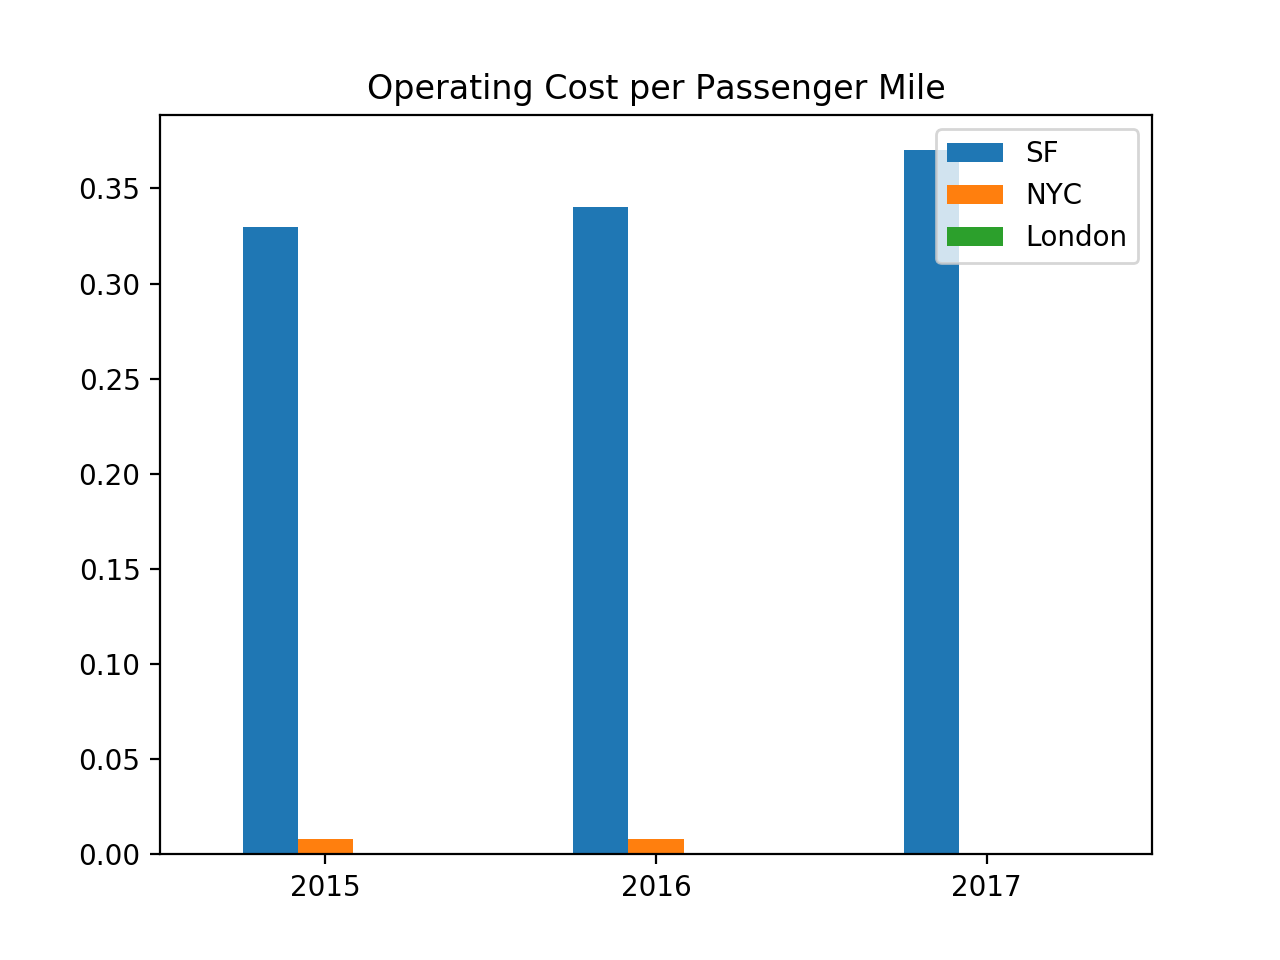

Text(0.5, 1.0, 'Operating Cost per Passenger Mile')

In [21]:
# Operating cost comparison
sf_op_cost15 = operating_costs_pd.iloc[0]["FY 15"]
sf_op_cost16 = operating_costs_pd.iloc[0]["FY 16"]
sf_op_cost17 = operating_costs_pd.iloc[0]["FY 17"]
sfOpCostTot = [sf_op_cost15, sf_op_cost16, sf_op_cost17]
nycOpCostTot = [nyc_opp_cost15, nyc_opp_cost16, nyc_opp_cost17]
londonOpCostTot = [0, 0, op_cost_per_pas_per_mile17]
index = [2015, 2016, 2017]
op_cost_tot_df = pd.DataFrame({'SF': sfOpCostTot,
                              'NYC': nycOpCostTot,
                              'London': londonOpCostTot},
                              index=index)
op_cost_tot_df.plot.bar(rot=0)
plt.title('Operating Cost per Passenger Mile')

<IPython.core.display.Javascript object>


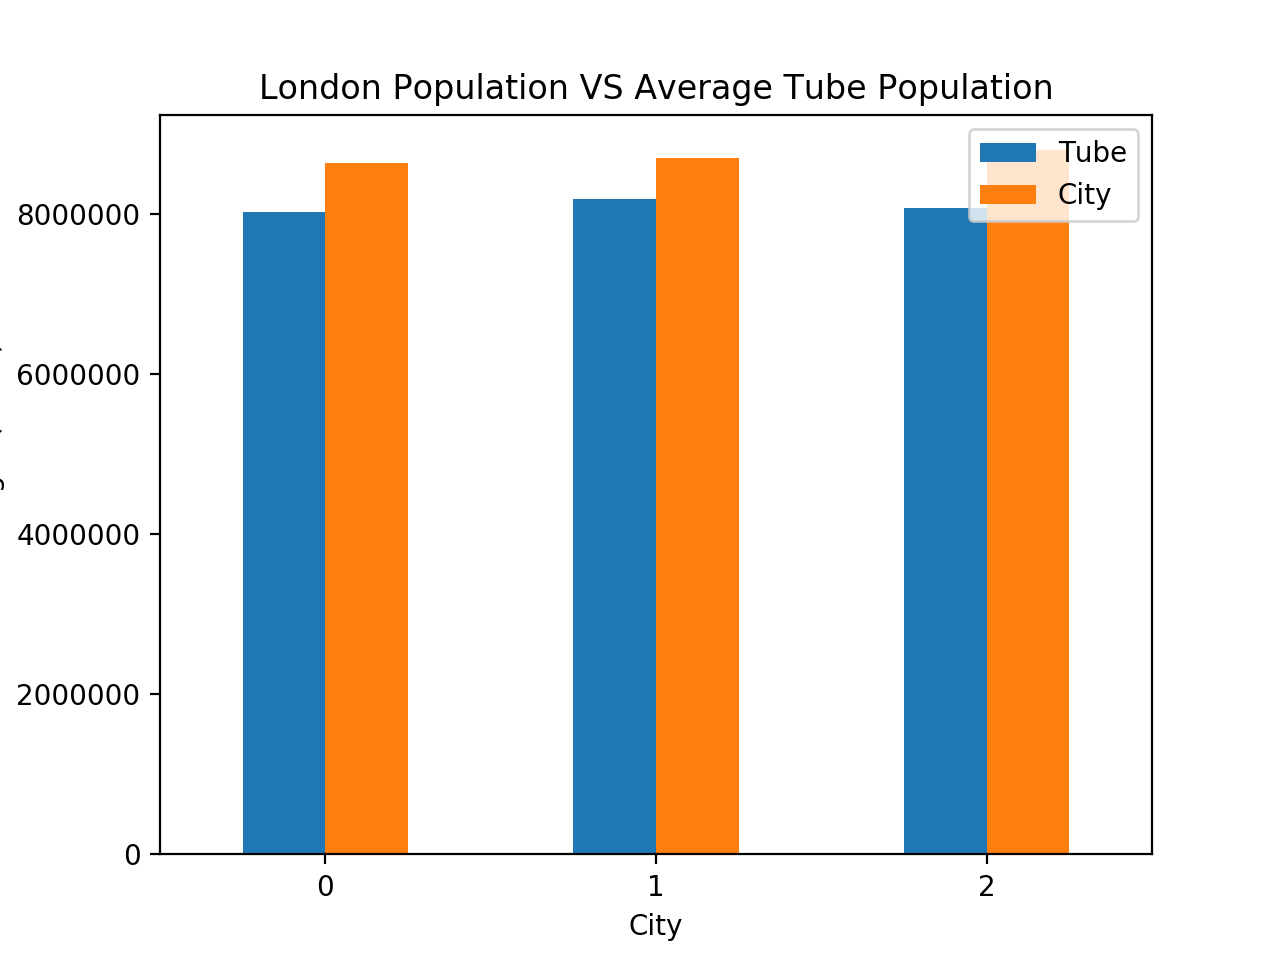

Text(0.5, 1.0, 'London Population VS Average Tube Population')

In [17]:
# City Population as compared to average metro population
city_populations_file = "BART Data Sources/city_pops.csv"
city_pops_df = pd.read_csv(city_populations_file)
#ridership_pd['2015'] = pd.to_numeric(ridership_pd['2015'], errors='coerce')
sf_avg_rider15 = 9076746 / 365
sf_avg_rider16 = 9201660 / 365
sf_avg_rider17 = 8750869 / 365
sf_avg_rider = [sf_avg_rider15, sf_avg_rider16, sf_avg_rider17]
london_avg_rider15 = traffic15 / 365
london_avg_rider16 = traffic16 / 365
london_avg_rider17 = traffic17 / 365
london_avg_rider = [london_avg_rider15, london_avg_rider16, london_avg_rider17]
index2 = [2015, 2016, 2017]
#print(sf_avg_rider15)
#print(nyc_avg_rider15)
#city_pops_df.head()
sf_pop15 = int(city_pops_df.iloc[0]['2015'])
sf_pop16 = int(city_pops_df.iloc[0]['2016'])
sf_pop17 = int(city_pops_df.iloc[0]['2017'])
sf_pop = [sf_pop15, sf_pop16, sf_pop17]
london_pop15 = int(city_pops_df.iloc[1]['2015'])
london_pop16 = int(city_pops_df.iloc[1]['2016'])
london_pop17 = int(city_pops_df.iloc[1]['2017'])
london_pop = [london_pop15, london_pop16, london_pop17]
#print(sf_pop15)
sf_avg_rider_df = pd.DataFrame({'BART': sf_avg_rider, 'City': sf_pop},
                             index=index2)
london_avg_rider_df = pd.DataFrame({'Tube': london_avg_rider, 'City': london_pop})
#sf_avg_rider_df.plot.bar(rot=0)
#plt.title('SF Population VS Average BART Population')
london_avg_rider_df.plot.bar(rot=0)
plt.title("London Population VS Average Tube Population")
#sf_avg_rider_df.head()
#london_avg_rider_df.head()

In [18]:
# Bar graph number of stations per city
stations = [380, 79, 268, 45 ]
x_axis = ['NYC', 'São Paulo', 'London', 'SF (BART)']
plt.bar(x_axis, stations, color='b', alpha=0.5, align='center')
#plt.title('Track Length by City')
plt.ylabel('Track Length (miles)')
plt.xlabel('City')

Text(0.5, 47.04444444444444, 'City')

In [30]:
track_length = [660.75, 49.7, 250, 121 ]
x_axis = ['NYC', 'São Paulo', 'London', 'SF (BART)']
plt.bar(x_axis, track_length, color='r', alpha=0.5, align='center')
#plt.title('Track Length by City')
plt.ylabel('Track Length (miles)')
plt.xlabel('City')

Text(0.5, 94.48888888888888, 'City')